In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv("/Users/sukhen/Desktop/CSV_files/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.groupby(['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [5]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#model building a evaluation

In [8]:
# create the predictor and target sets:

X = iris.drop("Species",axis = 1)
print(X)
y = iris['Species']
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

### Train Test Split :

In [9]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=99)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head()) 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
10    11            5.4           3.7            1.5           0.2
25    26            5.0           3.0            1.6           0.2
13    14            4.3           3.0            1.1           0.1
131  132            7.9           3.8            6.4           2.0
65    66            6.7           3.1            4.4           1.4
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
139  140            6.9           3.1            5.4           2.1
8      9            4.4           2.9            1.4           0.2
74    75            6.4           2.9            4.3           1.3
120  121            6.9           3.2            5.7           2.3
4      5            5.0           3.6            1.4           0.2
10         Iris-setosa
25         Iris-setosa
13         Iris-setosa
131     Iris-virginica
65     Iris-versicolor
Name: Species, dtype: object
139     Iris-virginica
8          Iris-setosa
74    

### Initializing the classifier:

In [10]:
dt_iris = DecisionTreeClassifier(max_depth = 2,random_state=99)
dt_iris.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=99)

In [11]:
# making predictions on training dataset:
y_train_predict = dt_iris.predict(X_train)
print(classification_report(y_train,y_train_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [12]:
# printing confusion matrix and accuracy score

print(confusion_matrix(y_train,y_train_predict))
print(accuracy_score(y_train,y_train_predict))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


In [13]:
y_test_predict = dt_iris.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
print(accuracy_score(y_test,y_test_predict))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]
1.0


### Visualisation :

In [14]:
!pip install graphviz

In [15]:
# importing packages required for visualization:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

In [16]:
features = list(X_train.columns)
# create the decesion tree as dot file
dot_data = export_graphviz(dt_iris,out_file = None,feature_names=features,filled = True)
#create the graph from dot file
graph = Source(dot_data)

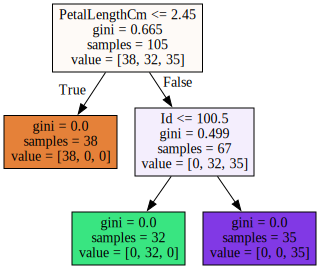

In [17]:
graph

### Grid Search Cross Validation(CV) :

In [18]:
from sklearn import model_selection

In [19]:
mod = model_selection.GridSearchCV(dt_iris,param_grid = ({'max_depth':[2,3,4,5]}))
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, random_state=99),
             param_grid={'max_depth': [2, 3, 4, 5]})

In [20]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=99)

In [21]:
mod.best_score_

0.9904761904761905

In [23]:
mod.best_params_

{'max_depth': 2}